In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [3]:
from sklearn import datasets

In [4]:
boston = datasets.load_boston()

In [5]:
print(boston.DESCR) #Description of this dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [95]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [96]:
df.drop(['CHAS', 'RAD'], axis=1, inplace=True) #I'm removing these two features because they are Categorical

In [84]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


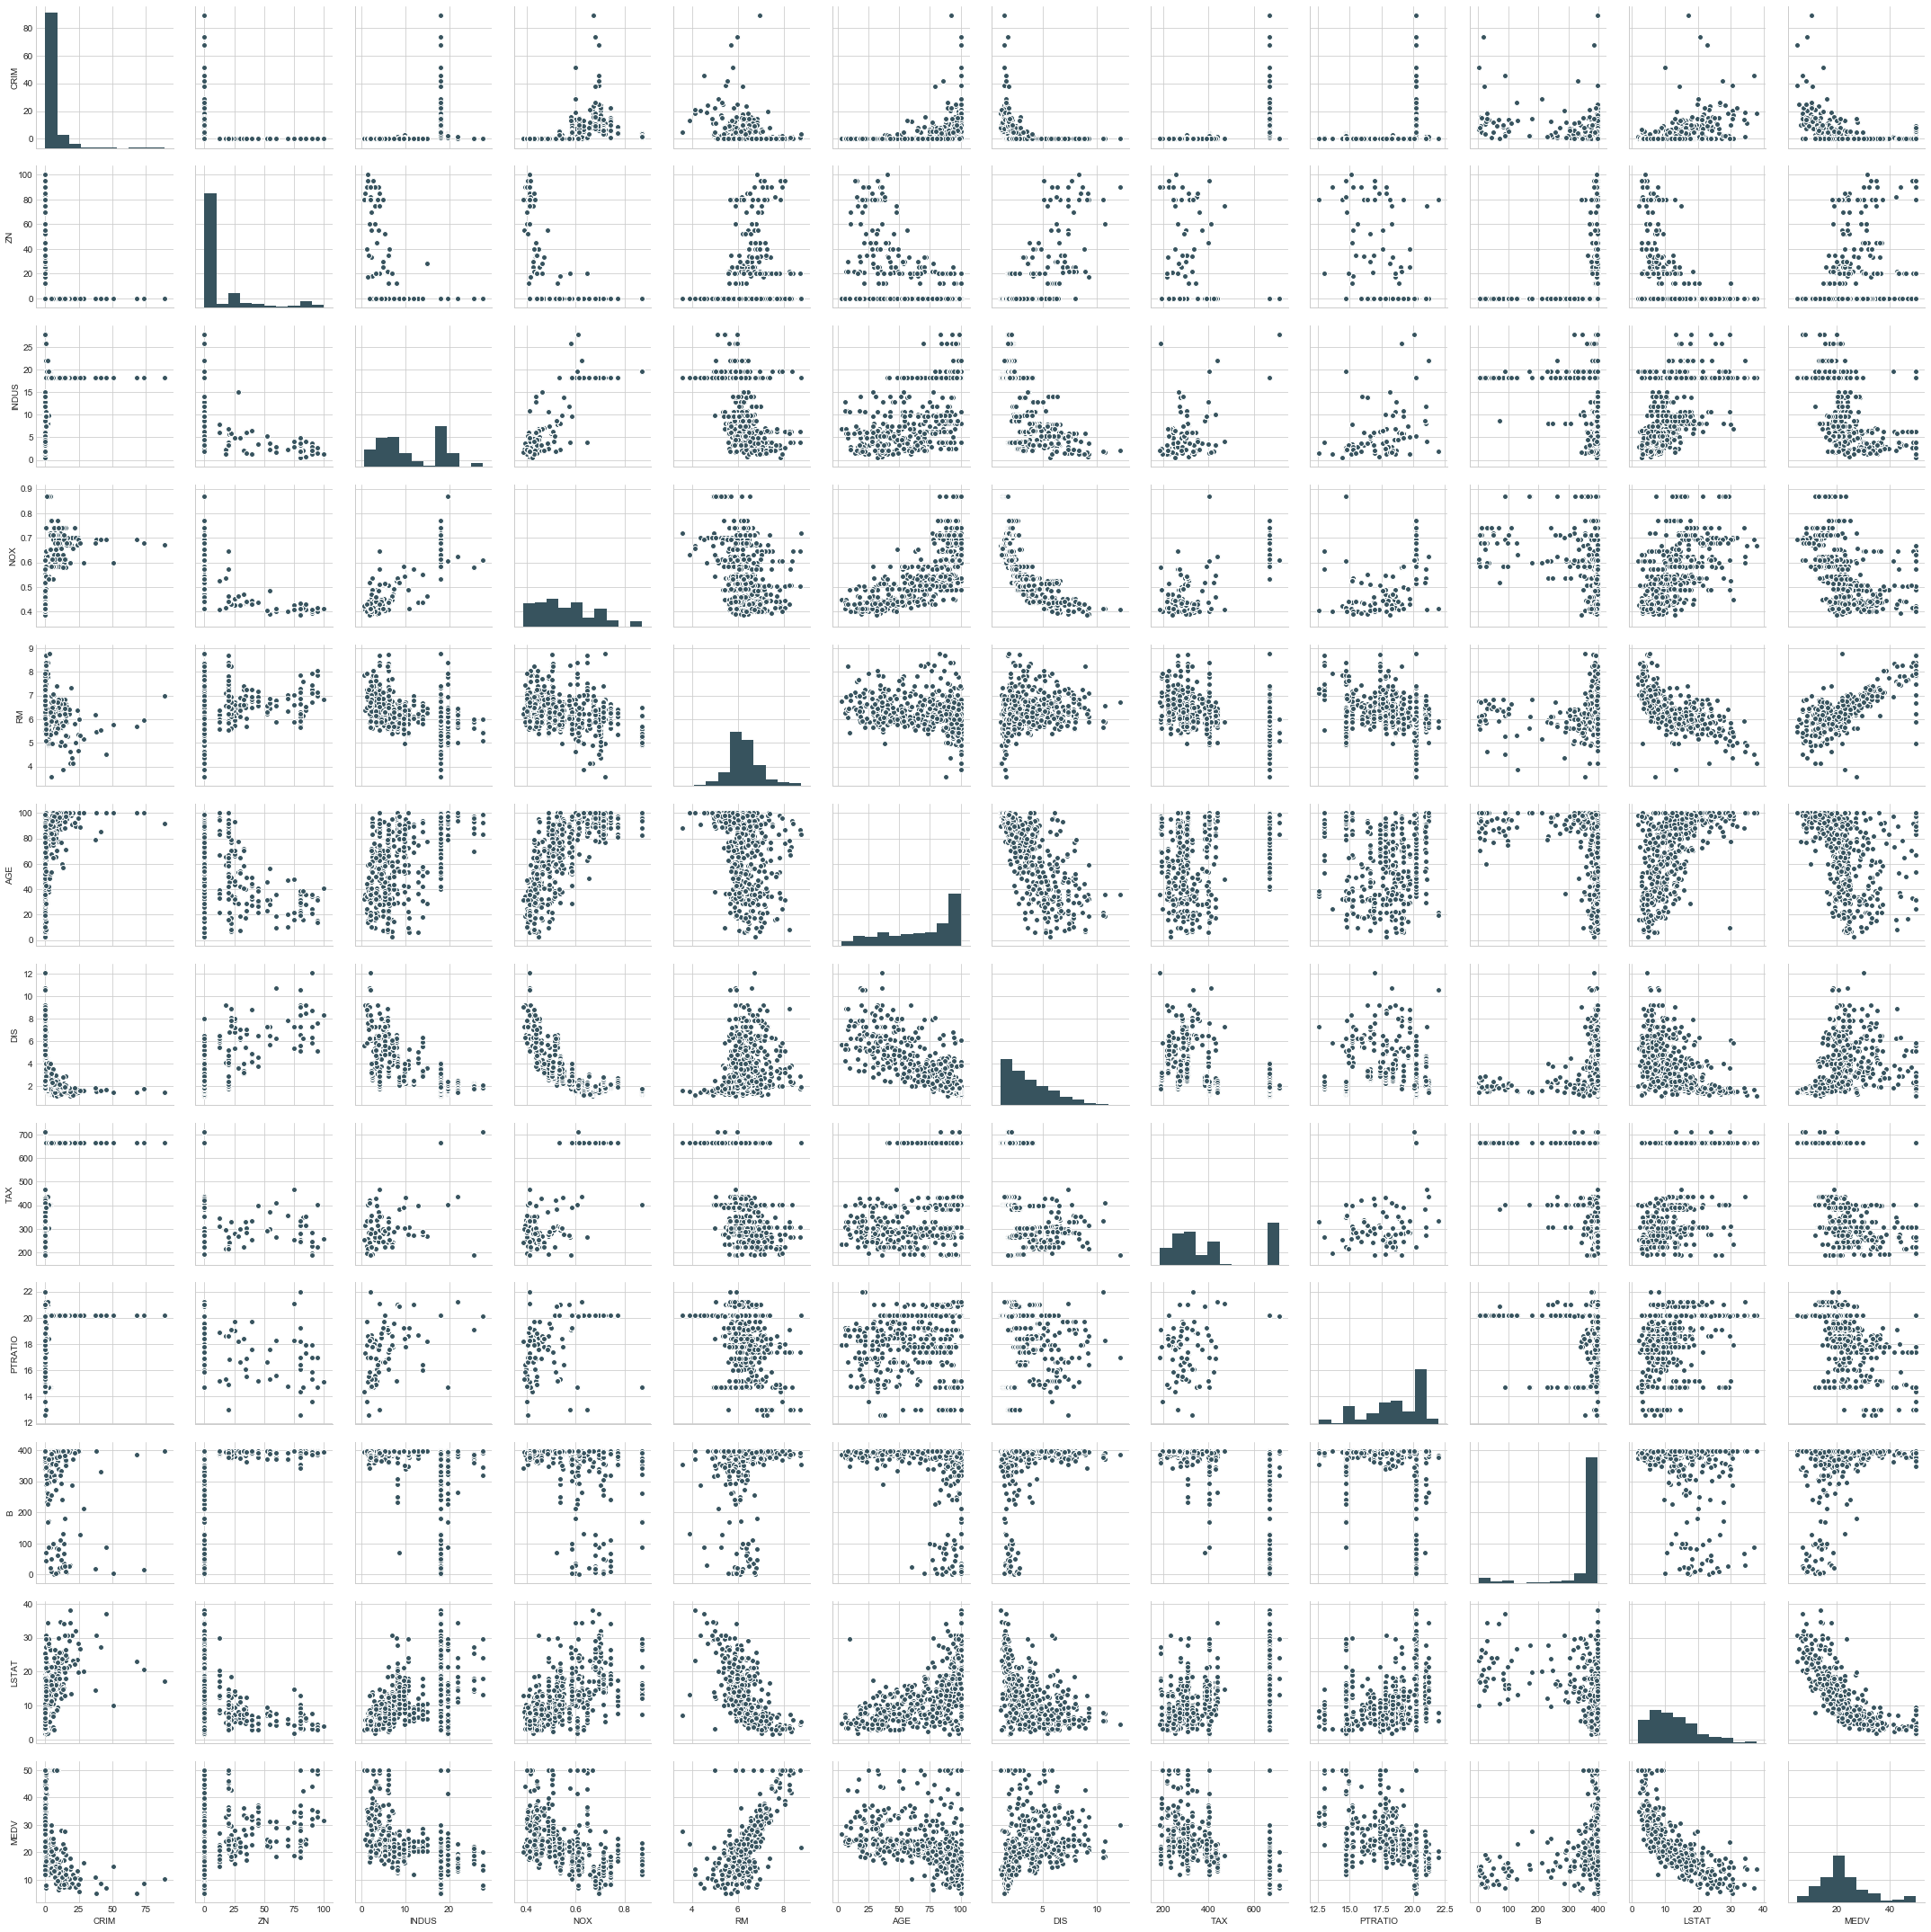

In [248]:
sns.pairplot(df)

# Start From Here

In [121]:
df['AGE'] = df['AGE']**1.3

In [158]:
df['F0'] = df['RM']*df['LSTAT']
df['F1'] = df['DIS']*df['NOX']
df['F2'] = df['DIS']*df['RM']
df['F3'] = df['AGE']*df['NOX']
df['F3'] = df['AGE']*df['LSTAT']
df['F4'] = df['RM']*df['NOX']

In [159]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [179]:
X2 = X.drop(['F0','F1','F2','F3','F4'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33,random_state=45)
lm2 = LinearRegression()
# lm2.fit(X_train, y_train)
# train_predictions = lm2.predict(X_train)
# test_predictions = lm2.predict(X_test)
# print("1st Model Train:",np.sqrt(mean_squared_error(y_train, train_predictions)))
# print("1st Model Test:",np.sqrt(mean_squared_error(y_test, test_predictions)))
kcv = cross_val_score(lm2, X2, y, cv=4)
kcv.mean(), kcv.std()

(0.056321536540797856, 0.7686505026584701)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=45)
lm1 = LinearRegression()
# lm1.fit(X_train, y_train)
# train_predictions = lm1.predict(X_train)
# test_predictions = lm1.predict(X_test)
# print("2nd Model Train:",np.sqrt(mean_squared_error(y_train, train_predictions)))
# print("2nd Model Test:",np.sqrt(mean_squared_error(y_test, test_predictions)))
kcv = cross_val_score(lm2, X, y, cv=4)
kcv.mean(), kcv.std()

(0.27321415201083765, 0.4704894838614166)

In [128]:
from sklearn.model_selection import cross_val_score

2.99495661821798

0.302051799696323

In [11]:
from sklearn.cross_validation import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
train_predictions =  lm.predict(X_train)
test_predictions =  lm.predict(X_test)

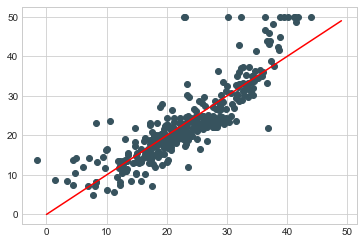

In [21]:
plt.scatter(train_predictions, y_train)
plt.plot(np.arange(0, 50), np.arange(0, 50), 'r')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


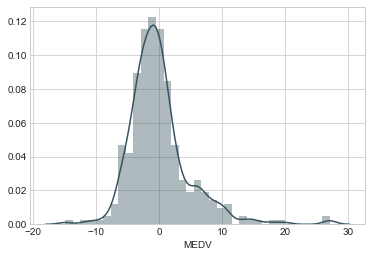

In [23]:
sns.distplot(y_train-train_predictions)

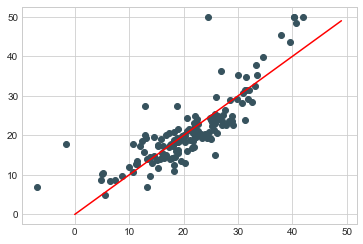

In [22]:
plt.scatter(test_predictions, y_test)
plt.plot(np.arange(0, 50), np.arange(0, 50), 'r')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


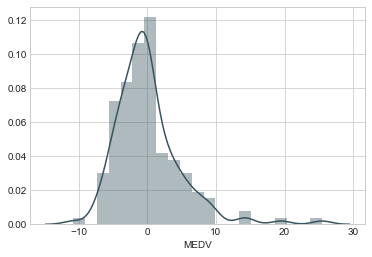

In [25]:
sns.distplot(y_test- test_predictions)

In [26]:
from sklearn.metrics import mean_squared_error

print("Train:",np.sqrt(mean_squared_error(y_train, train_predictions)))
print("Test:",np.sqrt(mean_squared_error(y_test, test_predictions)))

Train: 4.890595733462804
Test: 4.851481715175105


**I got 3.89 RMSE on Test data, with random seed of 42 for train_test_split**

```python
from sklearn.metrics import mean_squared_error

print("Train:",np.sqrt(mean_squared_error(y_train, train_predictions)))
print("Test:",np.sqrt(mean_squared_error(y_test, test_predictions)))
```

`Train: 4.221734396271904
Test: 3.890056361582175`

In [225]:
print("Train:",np.sqrt(mean_squared_error(y_train, train_predictions)))
print("Test:",np.sqrt(mean_squared_error(y_test, test_predictions)))

Train: 4.221734396271904
Test: 3.890056361582175
